# Who Is Losing Our Data?

It feels like data breaches are happening every day. So I looked at reports of data breaches.

### Data Sources
1. Identity Theft Resource Center https://www.idtheftcenter.org/
    * DataBreachReports_2014.pdf
    * DataBreachReports_2015.pdf
    * DataBreachReport_2016.pdf
    * ITRCBreachStatsReport2017c.pdf
    * ITRC_2018-End-of-Year-Aftermath_FINAL_V2_combinedWEB.pdf
    * 2019-June-Data-Breach-Package.pdf

    Used Tabula to convert them to .csv files
    * 2014-DataBreachReport.csv  
    * 2015-DataBreachReport.csv  
    * 2016-DataBreachReport.csv  
    * 2017-DataBreachReport.csv  
    * 2018-DataBreachReport.csv  
    * 2019-DataBreachReport.csv 

## Import All the Libraries

Set the graphics parameters, too.

In [1]:
import numpy as np
import pandas as pd

import re
import requests
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Prepare input data files

1. Read in data files
2. Clean up unwanted columns, add year markers
3. Combine files into one master set

In [2]:
breaches14 = pd.read_csv("data/2014-DataBreachReport.csv", na_values=["Unknown"])
breaches15 = pd.read_csv("data/2015-DataBreachReport.csv", na_values=["Unknown"])
breaches16 = pd.read_csv("data/2016-DataBreachReport.csv", na_values=["Unknown"])
breaches17 = pd.read_csv("data/2017-DataBreachReport.csv", na_values=["Unknown"])
breaches18 = pd.read_csv("data/2018-DataBreachReport.csv", na_values=["Unknown"])
breaches19 = pd.read_csv("data/2019-DataBreachReport.csv", na_values=["Unknown"])

In [3]:
breaches14.head(5)

,ID,organization,state,industry,exposure,records
0,ITRC20141216-02,Union First Market Bank,VA,Banking/Credit/Financial,Yes - Published #,3000.0
1,ITRC20141110-02,Palm Springs Federal Credit Union,CA,Banking/Credit/Financial,Yes - Published #,1600.0
2,ITRC20141103-06,Capital One,VA,Banking/Credit/Financial,Yes - Unknown #,NaN
3,ITRC20141028-04,Fidelity National Financial,GA,Banking/Credit/Financial,Yes - Unknown #,NaN
4,ITRC20141021-02,Advantage Funding Company,NY,Banking/Credit/Financial,Yes - Unknown #,NaN


In [4]:
breaches15.head(5)

,ID,organization,state,industry,exposure,records
0,ITRC20151229-03,Quincy Credit Union,MA,Banking/Credit/Financial,Yes - Unknown #,NaN
1,ITRC20151216-01,Toyota Motor Credit Corporation,CA,Banking/Credit/Financial,Yes - Unknown #,NaN
2,ITRC20151215-02,"Sorrento Pacific Financial, LLC",CA,Banking/Credit/Financial,Yes - Unknown #,NaN
3,ITRC20151209-02,"Citizens Financial Group, Inc.",RI,Banking/Credit/Financial,Yes - Published #,498.0
4,ITRC20151209-01,"Ameriprise Financial, Inc.",MN,Banking/Credit/Financial,Yes - Unknown #,NaN


In [5]:
breaches16.head(5)

,ID,organization,state,industry,exposure,records
0,ITRC20160105-01,Regional Income Tax Authority,OH,Business,Yes,50000.0
1,ITRC20160106-01,Southern New Hampshire University,NH,Education,Yes,140000.0
2,ITRC20160108-01,Indiana University Health Arnett Hospital,IN,Medical/Healthcare,Yes,29324.0
3,ITRC20160108-03,Fidelis Care,NY,Medical/Healthcare,Yes,738.0
4,ITRC20160108-04,Time Warner Cable,TX,Business,Yes,NaN


In [6]:
breaches17.head(5)

,ID,organization,state,industry,exposure,records
0,ITRC20170110-01,Legal Aid Society of Orange County,CA,Business,Yes - Published,1239.0
1,ITRC20170120-04,PrimeWest Health / Summit Reinsurance Services...,MN,Medical/Healthcare,Yes - Published #,2441.0
2,ITRC20170120-05,Waiting Room Solutions LLP,NY,Medical/Healthcare,Yes - Published,700.0
3,ITRC20170120-17,SpiraledgeInc. / SwimOutlet.com,CA,Business,Yes - Published #,426623.0
4,ITRC20170120-18,Contech Engineered Solutions,OH,Business,Yes - Unknown,NaN


In [7]:
breaches18.head(5)

,organization,state,date,type,industry,records
0,Charles River Medical Associates,MA,1/8/2018,Electronic,Medical/Healthcare,9378.0
1,"Rea.deemingBeauty, Inc. dba",PA,1/5/2018,Electronic,Business,18133.0
2,DHS Office of the Inspector General,DC,1/3/2018,Electronic,Government/Military,247167.0
3,"Flagship Facility Services, Inc.",CA,1/5/2018,Electronic,Business,NaN
4,TMC HealthCare,AZ,9/7/2018,Paper Data,Medical/Healthcare,1776.0


In [8]:
breaches19.head(5)

,organization,state,date,type,industry,records
0,Calista Corporation,AK,1/7/2019,Electronic,Business,NaN
1,University of Alaska (reported on,AK,1/26/2019,Electronic,Education,NaN
2,Progress Bank,AL,1/1/2019,Electronic,Banking/Credit/Financial,NaN
3,First Bank of Alabama,AL,1/27/2019,Electronic,Banking/Credit/Financial,NaN
4,Professional Tax & Accounting,AL,1/18/2019,Paper Data,Business,NaN


In [9]:
breaches14.drop({'ID','exposure'}, axis=1, inplace=True)
breaches15.drop({'ID','exposure'}, axis=1, inplace=True)
breaches16.drop({'ID','exposure'}, axis=1, inplace=True)
breaches17.drop({'ID','exposure'}, axis=1, inplace=True)
breaches18.drop({'date','type'}, axis=1, inplace=True)
breaches19.drop({'date','type'}, axis=1, inplace=True)

In [11]:
breaches14['year']=2014
breaches15['year']=2015
breaches16['year']=2016
breaches17['year']=2017
breaches18['year']=2018
breaches19['year']=2019

In [12]:
breaches14.info()
breaches14.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 5 columns):
organization    779 non-null object
state           779 non-null object
industry        779 non-null object
records         489 non-null float64
year            779 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 30.5+ KB


,organization,state,industry,records,year
0,Union First Market Bank,VA,Banking/Credit/Financial,3000.0,2014
1,Palm Springs Federal Credit Union,CA,Banking/Credit/Financial,1600.0,2014
2,Capital One,VA,Banking/Credit/Financial,NaN,2014
3,Fidelity National Financial,GA,Banking/Credit/Financial,NaN,2014
4,Advantage Funding Company,NY,Banking/Credit/Financial,NaN,2014


In [13]:
breaches15.info()
breaches15.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 5 columns):
organization    775 non-null object
state           775 non-null object
industry        775 non-null object
records         371 non-null float64
year            775 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 30.4+ KB


,organization,state,industry,records,year
0,Quincy Credit Union,MA,Banking/Credit/Financial,NaN,2015
1,Toyota Motor Credit Corporation,CA,Banking/Credit/Financial,NaN,2015
2,"Sorrento Pacific Financial, LLC",CA,Banking/Credit/Financial,NaN,2015
3,"Citizens Financial Group, Inc.",RI,Banking/Credit/Financial,498.0,2015
4,"Ameriprise Financial, Inc.",MN,Banking/Credit/Financial,NaN,2015


In [14]:
breaches16.info()
breaches16.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 5 columns):
organization    1087 non-null object
state           1087 non-null object
industry        1087 non-null object
records         533 non-null float64
year            1087 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 42.5+ KB


,organization,state,industry,records,year
0,Regional Income Tax Authority,OH,Business,50000.0,2016
1,Southern New Hampshire University,NH,Education,140000.0,2016
2,Indiana University Health Arnett Hospital,IN,Medical/Healthcare,29324.0,2016
3,Fidelis Care,NY,Medical/Healthcare,738.0,2016
4,Time Warner Cable,TX,Business,NaN,2016


In [15]:
breaches17.info()
breaches17.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 5 columns):
organization    1030 non-null object
state           1030 non-null object
industry        1030 non-null object
records         562 non-null float64
year            1030 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.3+ KB


,organization,state,industry,records,year
0,Legal Aid Society of Orange County,CA,Business,1239.0,2017
1,PrimeWest Health / Summit Reinsurance Services...,MN,Medical/Healthcare,2441.0,2017
2,Waiting Room Solutions LLP,NY,Medical/Healthcare,700.0,2017
3,SpiraledgeInc. / SwimOutlet.com,CA,Business,426623.0,2017
4,Contech Engineered Solutions,OH,Business,NaN,2017


In [16]:
breaches18.info()
breaches18.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 5 columns):
organization    1235 non-null object
state           1235 non-null object
industry        1235 non-null object
records         606 non-null float64
year            1235 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 48.3+ KB


,organization,state,industry,records,year
0,Charles River Medical Associates,MA,Medical/Healthcare,9378.0,2018
1,"Rea.deemingBeauty, Inc. dba",PA,Business,18133.0,2018
2,DHS Office of the Inspector General,DC,Government/Military,247167.0,2018
3,"Flagship Facility Services, Inc.",CA,Business,NaN,2018
4,TMC HealthCare,AZ,Medical/Healthcare,1776.0,2018


In [17]:
breaches19.info()
breaches19.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 5 columns):
organization    713 non-null object
state           713 non-null object
industry        713 non-null object
records         429 non-null float64
year            713 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 27.9+ KB


,organization,state,industry,records,year
0,Calista Corporation,AK,Business,NaN,2019
1,University of Alaska (reported on,AK,Education,NaN,2019
2,Progress Bank,AL,Banking/Credit/Financial,NaN,2019
3,First Bank of Alabama,AL,Banking/Credit/Financial,NaN,2019
4,Professional Tax & Accounting,AL,Business,NaN,2019


In [18]:
#779 + 775 + 1087 + 1030 + 1235 + 713
breaches = pd.concat([breaches14, breaches15, breaches16, breaches17, breaches18, breaches19])
breaches.info()
breaches.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 712
Data columns (total 5 columns):
organization    5619 non-null object
state           5619 non-null object
industry        5619 non-null object
records         2990 non-null float64
year            5619 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 263.4+ KB


,organization,state,industry,records,year
0,Union First Market Bank,VA,Banking/Credit/Financial,3000.0,2014
1,Palm Springs Federal Credit Union,CA,Banking/Credit/Financial,1600.0,2014
2,Capital One,VA,Banking/Credit/Financial,NaN,2014
3,Fidelity National Financial,GA,Banking/Credit/Financial,NaN,2014
4,Advantage Funding Company,NY,Banking/Credit/Financial,NaN,2014


In [32]:
breaches.industry.replace({'Banking/Credit/Financial':'Financial Services'}, inplace=True)
breaches.industry.replace({'Government/Military':'Government'}, inplace=True)
breaches.industry.replace({'Medical/Healthcare':'Healthcare'}, inplace=True)

array(['Financial Services', 'Business', 'Education', 'Government',
       'Healthcare'], dtype=object)

## Count the Breaches

1. We look at how many breaches there have been each year, and also see how they spread out across the country.

In [91]:
# across all years, by state, number of breaches
allcounts = pd.DataFrame(breaches.state.value_counts())
allcounts = allcounts.reset_index()

#this becomes a state map
allcounts.to_csv('data/breaches_state.csv', index=0)

In [20]:
# across all years, by state, top 10, number of breaches
allcounts.sort_values('state',ascending=False).head(10)

,index,state
0,CA,894
1,NY,448
2,TX,364
3,FL,287
4,IL,251
5,MA,215
6,PA,195
7,VA,181
8,GA,175
9,OH,166


In [92]:
#across all years, by state, number of records 
recorded=breaches.fillna(0)
recorded = pd.DataFrame(recorded.groupby('state').records.sum())
recorded.sort_values('records',ascending=False).head(12)
recorded = recorded.reset_index()

#this becomes a state map
recorded.to_csv('data/records_state.csv', index=0)

2018    1235
2016    1087
2017    1030
2014     779
2015     775
2019     713
Name: year, dtype: int64


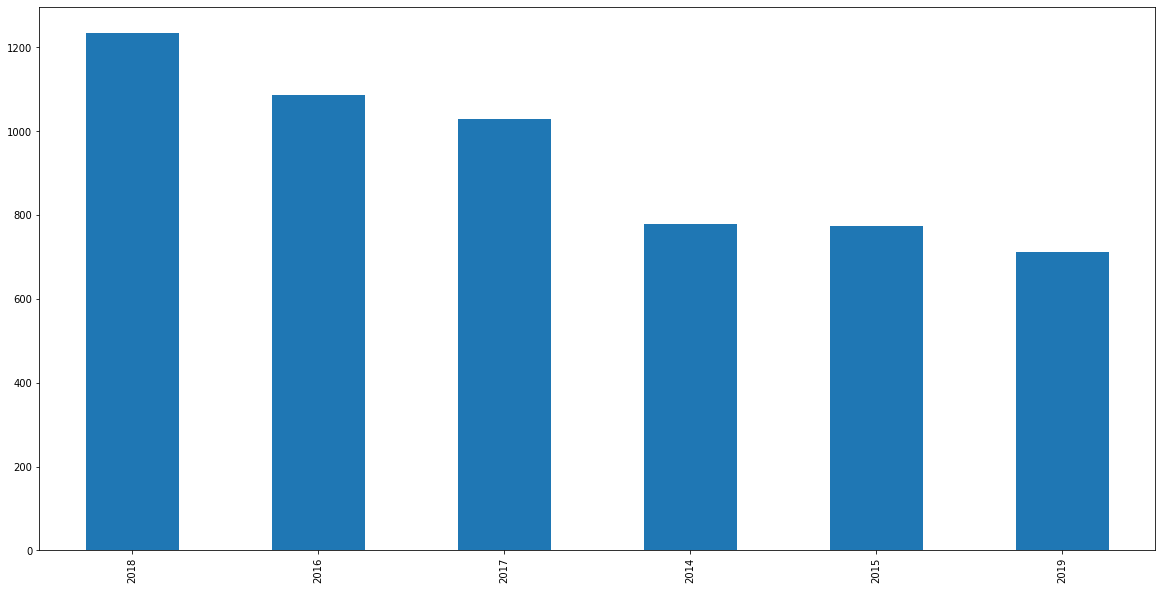

In [93]:
#number of breaches per year
print(breaches.year.value_counts())
breaches.year.value_counts().plot(kind="bar", figsize=(20,10))
plt.savefig("data/breaches_years.pdf", transparent=True)

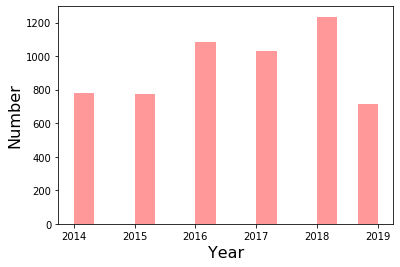

In [23]:
#sns.distplot(breaches['year'],kde = False)
sns.distplot(breaches['year'], kde=False, color='red', bins=15)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)

#sns.distplot(breaches['year'])
plt.show()

In [96]:
# what industry has the most breaches
breaches.industry.value_counts()

Business              2817
Healthcare            1603
Financial Services     471
Government             367
Education              361
Name: industry, dtype: int64

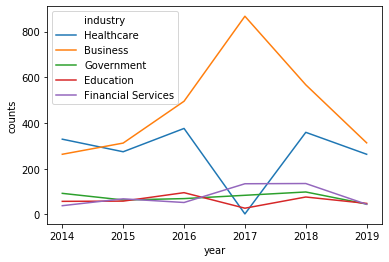

In [104]:
countyear = pd.DataFrame(breaches.groupby(by='year').industry.value_counts())
countyear = countyear.rename(columns={'industry':'counts'})
countyear = countyear.reset_index()
sns.lineplot(x="year", y="counts", hue="industry", data=countyear)
plt.savefig("data/year-counts.pdf", transparent=True)

In [118]:
countyear

,year,industry,counts
0,2014,Healthcare,329
1,2014,Business,263
2,2014,Government,92
3,2014,Education,57
4,2014,Financial Services,38
5,2015,Business,312
6,2015,Healthcare,274
7,2015,Financial Services,68
8,2015,Government,63
9,2015,Education,58


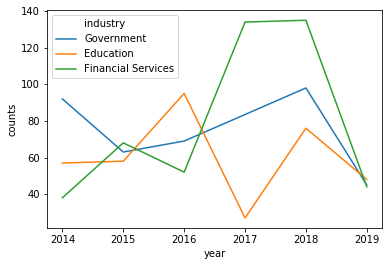

In [105]:
countyear_zoom = pd.DataFrame(breaches.groupby(by='year').industry.value_counts())
countyear_zoom = countyear_zoom.rename(columns={'industry':'counts'})
countyear_zoom = countyear_zoom.reset_index()
countyear_zoom = countyear_zoom[(countyear_zoom.industry != 'Healthcare') & (countyear_zoom.industry != 'Business')]
sns.lineplot(x="year", y="counts", hue="industry", data=countyear_zoom)
plt.savefig("data/year-counts_zoom.pdf", transparent=True)

In [77]:
# i have the data to find out the most affected industry in each state, by year
affected=pd.DataFrame(breaches.groupby(['year','state']).industry.value_counts())
affected = affected.rename(columns={'industry':'counts'})
affected=affected.reset_index()
affected= affected.sort_values('counts', ascending=False).drop_duplicates(['year','state'])
affected.head(10)

,year,state,industry,counts
510,2017,CA,Business,145
614,2018,CA,Business,116
563,2017,NY,Business,99
340,2016,CA,Business,99
809,2019,CA,Business,62
174,2015,CA,Business,57
730,2018,NY,Business,52
11,2014,CA,Business,47
584,2017,TX,Business,46
520,2017,FL,Business,46


In [82]:
affected18=breaches[breaches.year==2018]
affected18 = pd.DataFrame(affected18.groupby(['state']).industry.value_counts())
affected18=affected18.rename(columns={'industry':'counts'})
affected18=affected18.reset_index()
affected18= affected18.sort_values('counts', ascending=False).drop_duplicates(['state'])
affected18.head(10)

,state,industry,counts
15,CA,Business,116
131,NY,Business,52
166,TX,Business,34
52,IL,Business,26
171,US,Business,23
120,NJ,Business,22
179,VA,Business,20
33,FL,Business,20
148,PA,Business,19
136,OH,Business,18


In [107]:
#this becomes a state map
affected18.to_csv('data/18_industry.csv', index=0)

In [86]:
affected19=breaches[breaches.year==2019]
affected19 = pd.DataFrame(affected19.groupby(['state']).industry.value_counts())
affected19=affected19.rename(columns={'industry':'counts'})
affected19=affected19.reset_index()
affected19= affected19.sort_values('counts', ascending=False).drop_duplicates(['state'])
affected19.head(10)

,state,industry,counts
9,CA,Business,62
109,NY,Business,36
142,TX,Healthcare,25
31,FL,Business,19
48,IL,Business,13
76,MI,Healthcare,11
114,OH,Business,11
63,MA,Business,10
81,MN,Healthcare,10
126,PA,Business,10


In [108]:
affected19.to_csv('data/19_industry.csv')

In [95]:
#scratch work

#breaches[breaches.industry=='Educational']['year'].unique()
#recorded = pd.DataFrame(recorded.groupby(by='state').records.sum())
#recorded = recorded.reset_index()
#breaches.head(5)
#breaches.info()
#= allcounts.rename(columns={'index':'name'})
#allcounts = allcounts.sort_values('name')
#allcounts['index'].sort_values(ascending=True, inplace=True)
#allcounts = allcounts['index'].sort_values(ascending=True)
#topstate = breaches
#topstate = topstate[(topstate.State!='DC')]
#topstate.groupby('State').Records.sum().sort_values(ascending=False).head(5)
#topstate.groupby('State').Records.sum().sort_values(ascending=False).head(5).plot(kind="bar", figsize=(20,10))
#plt.savefig("topstates.pdf", transparent=True)

array([], dtype=int64)